In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O2','C2']
psi_dihedral=['C1','O2','C2','C3']

di_sugar=['GLC', 'GLC']
patterns1= ['GLC(*_*_)]-GLC(*_*_)', 'GLC(*_*_)-GLC(*_*_)','GLC(*_*_)]-[*]-GLC(*_*_)', 'GLC(*_*_)-[*]-GLC(*_*_)']
patterns2= ['DGlcpa1-2DGlcpa', 'DGlcpa1-2]DGlcpa', 'DGlcpa1-2[*]DGlcpa']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-2D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A0T', '1A0T', '1A0T', '1A0T', '1A0T', '1A0T', '1A14', '1AA5', '1AA5', '1AF6', '1AF6', '1AF6', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AGM', '1AGM', '1BHG', '1BHG', '1BJI', '1BRR', '1BRR', '1BXH', '1BXH', '1BZB', '1C0Q', '1C0Q', '1C0R', '1C0R', '1C3N', '1CAP', '1CB8', '1CF3', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1DBG', '1DBO', '1DOG', '1DOG', '1DP5', '1DPJ', '1DSR', '1DZE', '1E05', '1EX2', '1F4Y', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1FE0', '1FE4', '1FEE', '1FI1', '1FQ6', '1FVM', '1FVM', '1FVM', '1FVM', '1FVM', '1FVM', '1G0V', '1GAC', '1GAC', '1GAH', '1GAH', '1GAI', '1GAI', '1GAL', '1GLM', '1GLM', '1GNX', '1GPE', '1GPE', '1GSL', '1GW0', '1GW0', '1GYA', '1GZ9', '1H3X', '1H3Y', '1H4P', '1H4P', '1HFU', '1HH3', '1HH3', '1HH3', '1HH3', '1HHA', '1HHA', '1HHA', '1HHA', '1HHC', '1HHC', '1HHC', '1HHC', '1HHF', '1HHF', '1HHF', '1HHF', '1HM2', '1HM2', '1HM3', '1HM3', '1HMU', '1HMU

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 15 
valid torsion1 and torsion2: (15, 15)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['7.B', '6.B'], ['4C1', '4C1'])
(['8.B', '7.B'], ['4C1', '4C1'])
(['9.r', '8.r'], ['4C1', '4C1'])
(['8.r', '7.r'], ['4C1', '4C1'])
(['9.r', '8.r'], ['4C1', '4C1'])
(['8.r', '7.r'], ['4C1', '4C1'])
(['5.A', '4.A'], ['4C1', '4C1'])
(['6.A', '5.A'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['9.L', '8.L'], ['4C1', '4C1'])
(['8.L', '7.L'], ['4C1', '4C1'])
(['7.B', '6.B'], ['4C1', '4C1'])
(['8.B', '7.B'], ['4C1', '4C1'])
(['9.t', '8.t'], ['4C1', '4C1'])
(['8.t', '7.t'], ['4C1', '4C1'])


In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//1qkc.pdb B GLC 7 C1
../../pdbs//1qkc.pdb B GLC 6 O2
5598 5593
No connection found between 5598 and 5593
0
../../pdbs//1qkc.pdb B GLC 8 C1
../../pdbs//1qkc.pdb B GLC 7 O2
5609 5604
Connection found between 5609 and 5604
../../pdbs//6wlw.pdb r GLC 9 C1
../../pdbs//6wlw.pdb r GLC 8 O2
21009 21004
Connection found between(2) 21009 and 21004
../../pdbs//6wlw.pdb r GLC 8 C1
../../pdbs//6wlw.pdb r GLC 7 O2
20998 20993
No connection found between 20998 and 20993
3
../../pdbs//6wm2.pdb r GLC 9 C1
../../pdbs//6wm2.pdb r GLC 8 O2
72197 72192
Connection found between(2) 72197 and 72192
../../pdbs//6wm2.pdb r GLC 8 C1
../../pdbs//6wm2.pdb r GLC 7 O2
72186 72181
No connection found between 72186 and 72181
5
../../pdbs//3v0w.pdb A GLC 5 C1
../../pdbs//3v0w.pdb A GLC 4 O2
3308 3303
No connection found between 3308 and 3303
6
../../pdbs//3v0w.pdb A GLC 6 C1
../../pdbs//3v0w.pdb A GLC 5 O2
3319 3314
Connection found between 3319 and 3314
../../pdbs//7wjf.pdb B GLC 2 C1
../../pdbs//7wjf.pdb B

In [13]:
output_df.to_csv('DGlcpa1-2DGlcpa_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DGlcpa1-2DGlcpa_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
print(instant1.torsions)

         pdb                   phi site                   psi site       phi  \
0   1qkc.pdb  B GLC 7 C2 C1 GLC 6 O2 C2  B GLC 7 C1 GLC 6 O2 C2 C3  247.6910   
1   1qkc.pdb  B GLC 8 C2 C1 GLC 7 O2 C2  B GLC 8 C1 GLC 7 O2 C2 C3   43.9258   
2   6wlw.pdb  r GLC 9 C2 C1 GLC 8 O2 C2  r GLC 9 C1 GLC 8 O2 C2 C3  201.5710   
3   6wlw.pdb  r GLC 8 C2 C1 GLC 7 O2 C2  r GLC 8 C1 GLC 7 O2 C2 C3  260.9106   
4   6wm2.pdb  r GLC 9 C2 C1 GLC 8 O2 C2  r GLC 9 C1 GLC 8 O2 C2 C3  201.0070   
5   6wm2.pdb  r GLC 8 C2 C1 GLC 7 O2 C2  r GLC 8 C1 GLC 7 O2 C2 C3  262.9275   
6   3v0w.pdb  A GLC 5 C2 C1 GLC 4 O2 C2  A GLC 5 C1 GLC 4 O2 C2 C3  164.6970   
7   3v0w.pdb  A GLC 6 C2 C1 GLC 5 O2 C2  A GLC 6 C1 GLC 5 O2 C2 C3  177.3870   
8   7wjf.pdb  B GLC 2 C2 C1 GLC 1 O2 C2  B GLC 2 C1 GLC 1 O2 C2 C3  177.6670   
9   8agc.pdb  L GLC 9 C2 C1 GLC 8 O2 C2  L GLC 9 C1 GLC 8 O2 C2 C3  201.6120   
10  8agc.pdb  L GLC 8 C2 C1 GLC 7 O2 C2  L GLC 8 C1 GLC 7 O2 C2 C3  253.7290   
11  1fi1.pdb  B GLC 7 C2 C1 GLC 6 O2 C2 

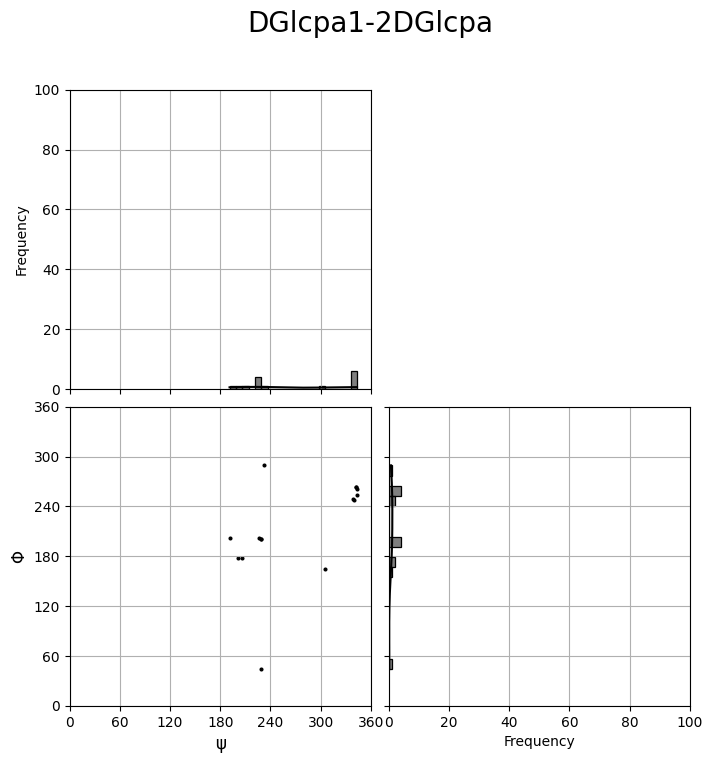

In [16]:
instant1.plot(torsions=instant1.torsions, title='DGlcpa1-2DGlcpa',max_histogram_scale=100,step_histogram_tick=20)